<a href="https://colab.research.google.com/github/madhapriya/Deep_learning-projects/blob/main/DLT_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


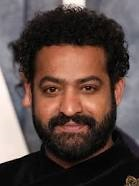

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Predictions: [[0.12233368 0.74259335 0.13507296]]
Predicted Age Group Index: 1
Predicted Age Group: MIDDLE


In [5]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

image_height = 128
image_width = 128
num_channels = 3

# Load the trained model
model = load_model('/content/trained_model_NEW_2_2_Dataset.h5')

# Load and display new face image
new_face_path = '/content/jntr.jpg'
new_face = Image.open(new_face_path)
display(new_face)

# Resize and preprocess
new_face = new_face.resize((image_width, image_height))
new_face = np.array(new_face)

# Normalize pixel values to [0,1]
new_face = new_face.astype('float32') / 255.0

# Add batch dimension
new_face = np.expand_dims(new_face, axis=0)  # shape: (1, 128, 128, 3)

# Predict
predictions = model.predict(new_face)
predicted_age_group = np.argmax(predictions)

print("Predictions:", predictions)
print("Predicted Age Group Index:", predicted_age_group)

age_mapping = {0: 'YOUNG', 1: 'MIDDLE', 2: 'OLD'}
predicted_age_group_label = age_mapping.get(predicted_age_group, "Unknown")

print("Predicted Age Group:", predicted_age_group_label)
